#### reference from where it came:https://github.com/ageron/handson-ml2/blob/master/01_the_machine_learning_landscape.ipynb

In [1]:
#for this we'll need a Python >= 3.5
import sys
assert sys.version_info >= (3,5) #with a comma and not a point as usual

In [2]:
#for this we'll need a Scikit-Learn >= 0.20 
import sklearn
assert sklearn.__version__ >= '0.2'

merging the two columns that we want to merge to start working on a proper dataframe. The two columns are:
OECD's life satisfaction and IMF's GDP per capita.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [4]:
#loading the data
oecd_bli = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/lifesat/oecd_bli_2015.csv', thousands=',')
gdp_per_capita = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/lifesat/gdp_per_capita.csv',
                            thousands=',', delimiter='\t', encoding='latin1', na_values='n/a')

In [5]:
#creating the proper function that we'll return a dataframe that we'll work
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli['INEQUALITY'] == 'TOT'] #new dataframe where the lines have only TOT values in INEQUALITY
    oecd_bli = oecd_bli.pivot(index='Country', columns='Indicator', values='Value') #reshape my dataframe to a new one, changing the indexes, columns and data distribution
    gdp_per_capita.rename(columns={'2015': 'GDP per capita'}, inplace=True) #changing the name of my previous GDP column to a proper one
    gdp_per_capita.set_index('Country', inplace=True) #re-indexing my dataframe using now the name of the countries
    #creating my new dataframe to be return in this function
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True) #merge the two dataframes mainting their indexes
    full_country_stats.sort_values(by='GDP per capita', inplace=True) #lines will be sorted in a crescent way by it's GDP value
    #removing some countries of our new dataframe
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices)) #subtracting the indices from the total set of indeces
    
    return full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[keep_indices]

In [6]:
#creating the working dataframe
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita) 

In [7]:
#preparing the data for the model and NOT THE PLOTTING
x = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

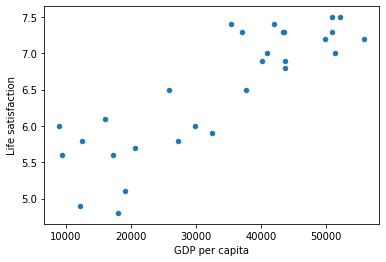

In [8]:
#finally visualizing the data
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.show()

In [9]:
#selecting a linear model for our analysis
model = sklearn.linear_model.LinearRegression()

In [10]:
#training our recently created model
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
#making now a prediction from a untrained value of data (in this case, Cyprus' GDP)
x_new = [[22587]] #that's the value of Cyprus' GDP per capita
print(model.predict(x_new)) #this would be our Life satisfaction value prediction for this country

[[5.96242338]]


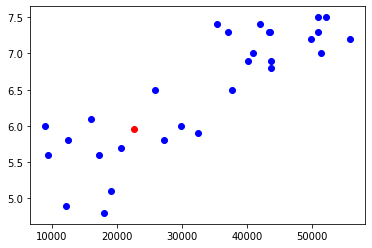

In [12]:
#visualizing this prediction
plt.scatter(x, y, color='blue')
plt.scatter(x_new, model.predict(x_new), color='red')